In [9]:
import pandas as pd

In [10]:
x = pd.read_csv("/opt/ml/input/data/open/train_df.csv")

In [42]:
import torch
torch.__version__

'1.7.1'

In [37]:
from torch.utils.data import Dataset, Subset, random_split
class DaconDataset(Dataset):
    
    def __init__(self,path):
        self.idledata = pd.read_csv(path)
        self.transform = None
        self.data_path = '/opt/ml/input/data/open/train/'
        self.num_class = len(self.idledata['label'].value_counts().index)
        print("zz")
        
    def get_num_class(self):
        return self.num_class
    

    def __len__(self):
        return len(self.idledata)

    def set_transform(self,transform):
        self.transform = transform

    def __getitem__(self,idx):
        image = Image.open(self.data_path + self.idledata.iloc[idx,1])
        image = np.array(image)

        label = self.idledata.iloc[idx,5]

        augment = self.transform(image=image)

        image = augment['image']

        return image,label

In [38]:
x = DaconDataset('/opt/ml/input/data/open/train_df.csv')

zz


In [41]:
x.get_num_class()

88

In [11]:
x['label'].value_counts().index

Index(['hazelnut-good', 'screw-good', 'carpet-good', 'pill-good', 'grid-good',
       'wood-good', 'leather-good', 'zipper-good', 'tile-good', 'cable-good',
       'metal_nut-good', 'capsule-good', 'transistor-good', 'bottle-good',
       'toothbrush-good', 'toothbrush-defective', 'pill-color',
       'screw-scratch_neck', 'metal_nut-bent', 'pill-crack',
       'screw-manipulated_front', 'capsule-scratch', 'metal_nut-flip',
       'capsule-crack', 'screw-thread_top', 'metal_nut-scratch',
       'screw-scratch_head', 'screw-thread_side', 'pill-scratch',
       'pill-contamination', 'bottle-broken_small', 'bottle-contamination',
       'capsule-poke', 'metal_nut-color', 'capsule-faulty_imprint',
       'wood-scratch', 'leather-color', 'leather-glue', 'leather-cut',
       'bottle-broken_large', 'pill-faulty_imprint', 'carpet-color',
       'zipper-broken_teeth', 'capsule-squeeze', 'carpet-thread', 'carpet-cut',
       'leather-poke', 'tile-crack', 'pill-combined', 'hazelnut-hole',
      

In [36]:
from PIL import Image
data_path = "/opt/ml/input/data/open/train/"

transistor-cut_lead


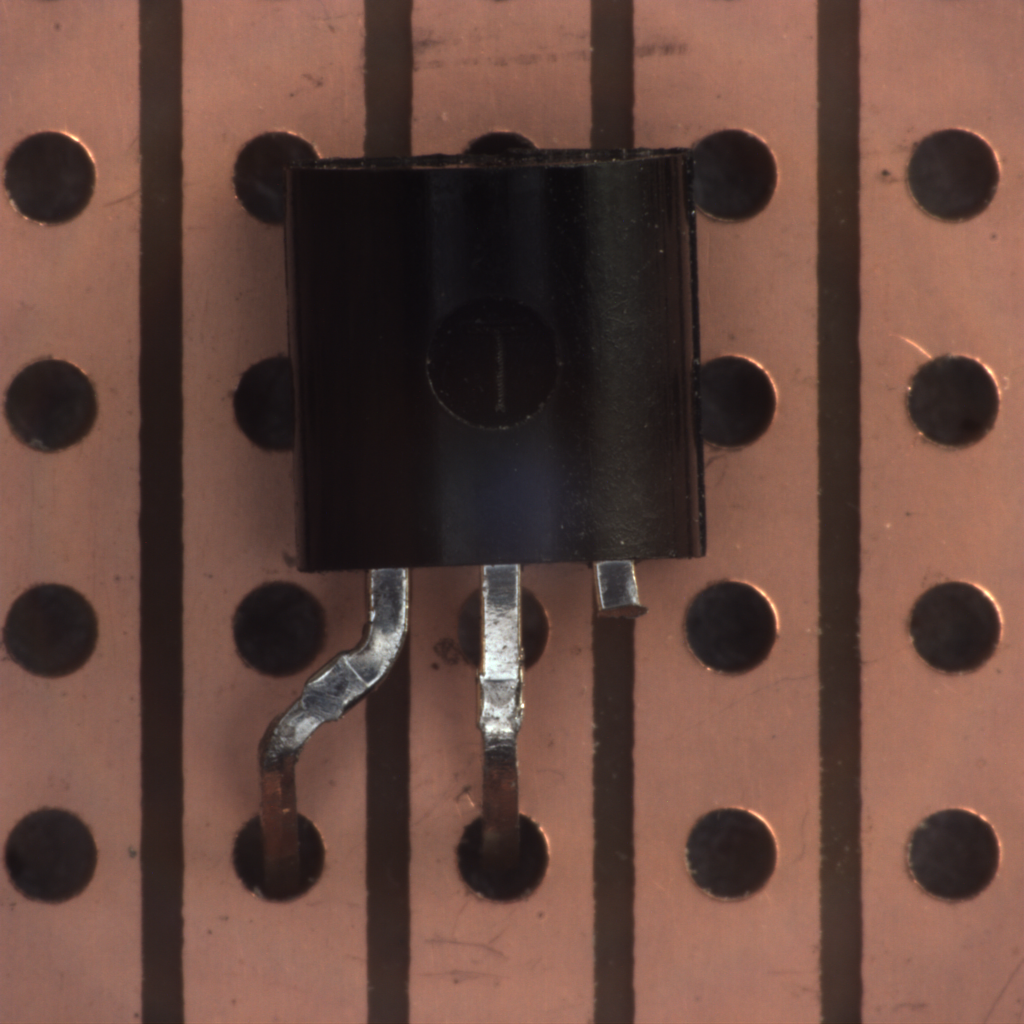

In [46]:
state = 'cut_lead'

print(x[x['state'] == state].iloc[0]['label'])
Image.open(data_path+x[x['state'] == state].iloc[0]['file_name'])

In [1]:
from model import PretrainedModel

ImportError: cannot import name 'PretrainedModel' from 'model' (/opt/ml/code/dacon/model.py)

In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from functools import reduce

class PretrainedModel:
    def __init__(self, model_name,num_class):
        self.model_name = model_name
        self.num_class = num_class
        model = getattr(models,model_name)(pretrained=True)
        
        for name, mod in reversed(list(model.named_modules())):
            if isinstance(mod, nn.Linear):
                mod_path = name.split('.')
                classifier_parent = reduce(nn.Module.children, mod_path[:-1], model)
                setattr(classifier_parent, mod_path[-1], nn.Sequential(
                    nn.Linear(mod.in_features, 4096),
                    nn.ReLU(inplace=True),
                    nn.Dropout(0.7),
                    nn.Linear(4096, 4096),
                    nn.ReLU(inplace=True),
                    nn.Dropout(0.5),
                    nn.Linear(4096, self.num_class)
                ))
                break

        self.model = model
        
    def __call__(self):
        return self.model

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
class zz():
    def __init__(self):
        print("xx")

    def __call__(self):
        print('cc')

x= zz()()

xx
cc


In [34]:
import os
import random
from collections import defaultdict
from enum import Enum
from typing import Tuple, List

import pandas as pd
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset, Subset, random_split
from torchvision.transforms import Resize, ToTensor, Normalize, Compose, CenterCrop, ColorJitter
import albumentations as A
import albumentations.pytorch


class AlbumAugmentation:
    def __init__(self):
        self.transform = A.Compose([
            A.Resize(512,512),
            A.HorizontalFlip(p=0.5),
            #A.ColorJitter(brightness=0.2, contrast=0.2,p=0.5),
            #A.RandomBrightnessContrast(p=0.2),
            A.Normalize(),
            A.pytorch.transforms.ToTensorV2()
        ])
        print("xxxx")

    def __call__(self,image):
        return self.transform(image=image)


class DaconDataset(Dataset):
    
    def __init__(self,path):
        self.idledata = pd.read_csv(path)
        self.transform = None
        self.data_path = '/opt/ml/input/data/open/train/'
        self.num_class = len(self.idledata['label'].value_counts().index)
        self.wordtolabel = {}
        num = 0
        for i in self.idledata['label'].value_counts().index:
            self.wordtolabel[i] = num
            num += 1
        print("zzx")
        
    def get_num_class(self):
        return self.num_class
    

    def __len__(self):
        return len(self.idledata)

    def set_transform(self,transform):
        self.transform = transform

    def __getitem__(self,idx):
        image = Image.open(self.data_path + self.idledata.iloc[idx,1])
        image = np.array(image)

        label = self.wordtolabel[self.idledata.iloc[idx,4]]

        augment = self.transform()(image= image)

        image = augment['image']

        return image,label

In [35]:
x = DaconDataset('/opt/ml/input/data/open/train_df.csv')
x.set_transform(AlbumAugmentation)

zzx


In [36]:
from torch.utils.data import DataLoader
xx = DataLoader(x,batch_size=4)

In [ ]:
next(iter(xx))

In [97]:
from torch import nn

In [107]:
label

tensor([12, 11, 12,  5])

In [98]:
criterion = nn.CrossEntropyLoss()

In [3]:
model = PretrainedModel('resnet50',88)()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /opt/ml/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 84.5MB/s]


In [93]:
out = model(image)

In [109]:
criterion(out,label).item()

4.498266220092773

In [67]:
import os
import random
from collections import defaultdict
from enum import Enum
from typing import Tuple, List

import pandas as pd
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset, Subset, random_split
from torchvision.transforms import Resize, ToTensor, Normalize, Compose, CenterCrop, ColorJitter
import albumentations as A
import albumentations.pytorch
from torch.utils.data import DataLoader

class AlbumAugmentation1:
    def __init__(self):
        self.transform = A.Compose([
            A.Resize(512,512),
            A.HorizontalFlip(p=0.5),
            A.ColorJitter(brightness=0.2, contrast=0.2,p=0.5),
            A.RandomBrightnessContrast(p=0.2),
            A.Normalize(),
            A.pytorch.transforms.ToTensorV2()
        ])
        

    def __call__(self,image):
        return self.transform(image=image)


class DaconDataset1(Dataset):
    
    def __init__(self,path):
        self.idledata = pd.read_csv(path)
        self.transform = None
        self.data_path = '/opt/ml/input/data/open/train/'
        self.num_class = len(self.idledata['label'].value_counts().index)
        self.wordtolabel = {}
        num = 0
        for i in self.idledata['label'].value_counts().index:
            self.wordtolabel[i] = num
            num += 1
        
        
    def get_num_class(self):
        return self.num_class
    

    def __len__(self):
        return len(self.idledata)

    def set_transform(self,transform):
        self.transform = transform

    def __getitem__(self,idx):
        image = Image.open(self.data_path + self.idledata.iloc[idx,1]).convert("RGB")
        
        image = np.array(image)

        label = self.wordtolabel[self.idledata.iloc[idx,4]]
        transform = A.Compose([
            A.Resize(512,512),
            A.HorizontalFlip(p=0.5),
            # A.ColorJitter(brightness=0.2, contrast=0.2,p=0.5),
            # A.RandomBrightnessContrast(p=0.2),
            A.Normalize(),
            A.pytorch.transforms.ToTensorV2()
        ])
        augment = transform(image= image)

        image = augment['image']

        return image,label

x = DaconDataset1("/opt/ml/input/data/open/train_df.csv")
# x.set_transform(AlbumAugmentation1)
y = DataLoader(x,batch_size=8,pin_memory=True)
next(iter(y))

[tensor([[[[ 0.2282,  0.3481,  0.3994,  ...,  0.4337,  0.3652,  0.3481],
           [ 0.3481,  0.4166,  0.4337,  ...,  0.4337,  0.4337,  0.4337],
           [ 0.3652,  0.4508,  0.4337,  ...,  0.4166,  0.4508,  0.4679],
           ...,
           [ 0.5022,  0.5193,  0.4851,  ...,  0.2624,  0.2624,  0.2453],
           [ 0.4337,  0.5022,  0.4851,  ...,  0.2796,  0.2796,  0.2967],
           [ 0.5022,  0.5364,  0.5364,  ...,  0.3309,  0.3309,  0.3138]],
 
          [[-0.2850, -0.2325, -0.2325,  ..., -0.2500, -0.2325, -0.2675],
           [-0.2325, -0.1975, -0.1800,  ..., -0.2325, -0.2325, -0.2150],
           [-0.2150, -0.1975, -0.2150,  ..., -0.2150, -0.2150, -0.1800],
           ...,
           [-0.1275, -0.1450, -0.1800,  ..., -0.3200, -0.3200, -0.3375],
           [-0.1275, -0.1450, -0.1625,  ..., -0.2500, -0.2850, -0.3025],
           [-0.1800, -0.1800, -0.1625,  ..., -0.2675, -0.2675, -0.2850]],
 
          [[-0.1835, -0.2010, -0.1835,  ..., -0.2358, -0.2532, -0.1835],
           [-

In [66]:
Image.open("/opt/ml/input/data/open/train/10007.png")

'L'

In [48]:
next(iter(y))

ValueError: operands could not be broadcast together with shapes (512,512) (3,) (512,512) 

In [40]:
i.shape

torch.Size([4, 3, 512, 512])

In [12]:
from dataset import DaconDataset,AlbumAugmentation

In [4]:
from torch.utils.data import DataLoader

In [5]:
import multiprocessing

In [1]:
import torch

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
x = [1.]
p = torch.tensor(x,requires_grad=True)

In [10]:
str(int(p))

'1'

In [11]:
zz = {'hazelnut-good': 0, 'screw-good': 1, 'carpet-good': 2, 'pill-good': 3, 'grid-good': 4, 'wood-good': 5, 'leather-good': 6, 'zipper-good': 7, 'tile-good': 8, 'cable-good': 9, 'metal_nut-good': 10, 'capsule-good': 11, 'transistor-good': 12, 'bottle-good': 13, 'toothbrush-good': 14, 'toothbrush-defective': 15, 'pill-color': 16, 'screw-scratch_neck': 17, 'metal_nut-bent': 18, 'pill-crack': 19, 'screw-manipulated_front': 20, 'capsule-scratch': 21, 'metal_nut-flip': 22, 'capsule-crack': 23, 'screw-thread_top': 24, 'metal_nut-scratch': 25, 'screw-scratch_head': 26, 'screw-thread_side': 27, 'pill-scratch': 28, 'pill-contamination': 29, 'bottle-broken_small': 30, 'bottle-contamination': 31, 'capsule-poke': 32, 'metal_nut-color': 33, 'capsule-faulty_imprint': 34, 'wood-scratch': 35, 'leather-color': 36, 'leather-glue': 37, 'leather-cut': 38, 'bottle-broken_large': 39, 'pill-faulty_imprint': 40, 'carpet-color': 41, 'zipper-broken_teeth': 42, 'capsule-squeeze': 43, 'carpet-thread': 44, 'carpet-cut': 45, 'leather-poke': 46, 'tile-crack': 47, 'pill-combined': 48, 'hazelnut-hole': 49, 'hazelnut-print': 50, 'tile-oil': 51, 'hazelnut-cut': 52, 'carpet-metal_contamination': 53, 'leather-fold': 54, 'zipper-fabric_border': 55, 'hazelnut-crack': 56, 'zipper-split_teeth': 57, 'zipper-rough': 58, 'carpet-hole': 59, 'tile-glue_strip': 60, 'tile-rough': 61, 'tile-gray_stroke': 62, 'zipper-combined': 63, 'zipper-squeezed_teeth': 64, 'zipper-fabric_interior': 65, 'cable-cut_inner_insulation': 66, 'cable-bent_wire': 67, 'grid-metal_contamination': 68, 'grid-thread': 69, 'grid-broken': 70, 'cable-combined': 71, 'wood-combined': 72, 'cable-missing_cable': 73, 'grid-bent': 74, 'cable-cable_swap': 75, 'grid-glue': 76, 'cable-poke_insulation': 77, 'transistor-cut_lead': 78, 'wood-hole': 79, 'cable-missing_wire': 80, 'pill-pill_type': 81, 'transistor-misplaced': 82, 'transistor-bent_lead': 83, 'transistor-damaged_case': 84, 'cable-cut_outer_insulation': 85, 'wood-liquid': 86, 'wood-color': 87}

In [12]:
zz['ha']

KeyError: 0

In [14]:
import pandas as pd
x = pd.read_csv("/opt/ml/input/data/open/test_df.csv")

In [18]:
x.loc[0][1]

'20000.png'

In [31]:
import os
import random
from collections import defaultdict
from enum import Enum
from typing import Tuple, List

import pandas as pd
import numpy as np
import torch
from PIL import Image
from torch.utils.data import Dataset, Subset, random_split
from torchvision.transforms import Resize, ToTensor, Normalize, Compose, CenterCrop, ColorJitter
import albumentations as A
import albumentations.pytorch

class TestAugmentation:
    def __init__(self):
        self.transform = A.Compose([
            A.Resize(512,512),
            #A.HorizontalFlip(p=0.5),
            #A.ColorJitter(brightness=0.2, contrast=0.2,p=0.5),
            #A.RandomBrightnessContrast(p=0.2),
            A.Normalize(),
            A.pytorch.transforms.ToTensorV2()
        ])
        

    def __call__(self,image):
        return self.transform(image=image)

class TestDataset(Dataset):
    
    def __init__(self,path):
        self.idledata = pd.read_csv('/opt/ml/input/data/open/train_df.csv')
        self.transform = None
        self.data_path = '/opt/ml/input/data/open/test/'
        
        self.wordtolabel = {}
        num = 0
        for i in self.idledata['label'].value_counts().index:
            self.wordtolabel[num] = i 
            num += 1
        
        self.testdata = pd.read_csv(path)

    def set_transform(self,transform):
        self.transform = transform
        
    def get_num_class(self):
        return self.num_class
    

    def __len__(self):
        return len(self.idledata)


    def __getitem__(self,idx):
        image = Image.open(self.data_path + self.testdata.iloc[idx,1]).convert("RGB")
        image = np.array(image)
        augment = self.transform()(image= image)

        image = augment['image']

        return image


In [32]:
dataset = TestDataset('/opt/ml/input/data/open/test_df.csv')
dataset.set_transform(TestAugmentation)

In [33]:
from torch.utils.data import DataLoader

loader = DataLoader(
        dataset,
        batch_size=16,
        num_workers=2,
        shuffle=False,
    )

In [34]:
for idx,image in enumerate(loader):
    print('zz')

zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz
zz


IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_8192/1906110431.py", line 58, in __getitem__
    image = Image.open(self.data_path + self.testdata.iloc[idx,1]).convert("RGB")
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py", line 925, in __getitem__
    return self._getitem_tuple(key)
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py", line 1506, in _getitem_tuple
    self._has_valid_tuple(tup)
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py", line 754, in _has_valid_tuple
    self._validate_key(k, i)
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py", line 1409, in _validate_key
    self._validate_integer(key, axis)
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py", line 1500, in _validate_integer
    raise IndexError("single positional indexer is out-of-bounds")
IndexError: single positional indexer is out-of-bounds


In [1]:
from torchvision import models

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x = models.vit_l_16()

In [6]:
y = models.resnet50()

In [7]:
y

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
x

VisionTransformer(
  (conv_proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (linear_1): Linear(in_features=1024, out_features=4096, bias=True)
          (act): GELU()
          (dropout_1): Dropout(p=0.0, inplace=False)
          (linear_2): Linear(in_features=4096, out_features=1024, bias=True)
          (dropout_2): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((1024,), eps=1e-06, elementwise_affine

In [9]:
from torch import nn
x.heads = nn.Linear(1024,88)

AttributeError: 'str' object has no attribute 'heads'